In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import datetime

import warnings
warnings.filterwarnings('ignore')
print('Libraries Import Successful')

Libraries Import Successful


1. Load the kinematics dataset as measured on mobile sensors from the file "run or
walk.csv."
2. List the columns in the dataset.
3. Perform EDA
4. Let the target variable "y" be the activity, and assign all the other columns to "x."
5. Apply the classification model.
6. Generate a classification report .

In [32]:
Tdata=pd.read_csv('run_or_walk.csv')
df=Tdata
df.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


In [13]:
df.shape

(88588, 11)

In [15]:
df.nunique()

date                 12
time              88588
username              1
wrist                 2
activity              2
acceleration_x    30307
acceleration_y    23957
acceleration_z    19698
gyro_x            40988
gyro_y            38957
gyro_z            51296
dtype: int64

Note: In below cell i have check is there any null value ,
    but seems there is no null value using df only for further processing 

In [17]:
df_M=df.isnull().sum()
df_M

date              0
time              0
username          0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

In [19]:
df.dtypes

date               object
time               object
username           object
wrist               int64
activity            int64
acceleration_x    float64
acceleration_y    float64
acceleration_z    float64
gyro_x            float64
gyro_y            float64
gyro_z            float64
dtype: object

In [21]:
df.describe()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,0.522170,0.500801,-0.074811,-0.562585,-0.313956,0.004160,0.037203,0.022327
std,0.499511,0.500002,1.009299,0.658458,0.486815,1.253423,1.198725,1.914423
min,0.000000,0.000000,-5.350500,-3.299000,-3.753800,-4.430600,-7.464700,-9.480000
25%,0.000000,0.000000,-0.381800,-1.033500,-0.376000,-0.920700,-0.644825,-1.345125
50%,1.000000,1.000000,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900
75%,1.000000,1.000000,0.355500,-0.241775,-0.085900,0.888800,0.733700,1.398200
max,1.000000,1.000000,5.603300,2.668000,1.640300,4.874200,8.498000,11.266200


In [23]:
print('Dataset contains ' + str(pd.value_counts(df['activity'].values)[0]) + ' "walk" data samples as well as ' + str(pd.value_counts(df['activity'].values)[1]) + ' "run" data samples')

Dataset contains 44223 "walk" data samples as well as 44365 "run" data samples


In [26]:
print('The dataset contains ' + str(pd.value_counts(df['wrist'].values)[0]) + ' data samples collected on the left wrist as well as ' + str(pd.value_counts(df['wrist'].values)[1]) + ' data samples collected on the right wrist')

The dataset contains 42330 data samples collected on the left wrist as well as 46258 data samples collected on the right wrist


In [27]:
# Categorical Data Analysis - and distribution 

In [25]:
# Wrist types
LEFT_WRIST = 0
RIGHT_WRIST = 1

# populate dataframe with 'walk' data only
df_walk_data = pd.DataFrame()
df_walk_data = df[(df.activity == 0)]

# populate dataframe with 'run' data only 
df_run_data = pd.DataFrame()
df_run_data = df[(df.activity == 1)]

walk_data_left_wrist_count = pd.value_counts(df_walk_data['wrist'].values, sort=False)[LEFT_WRIST]
walk_data_right_wrist_count = pd.value_counts(df_walk_data['wrist'].values, sort=False)[RIGHT_WRIST]

run_data_left_wrist_count = pd.value_counts(df_run_data['wrist'].values, sort=False)[LEFT_WRIST]
run_data_right_wrist_count = pd.value_counts(df_run_data['wrist'].values, sort=False)[RIGHT_WRIST]

print('Total number of "walk" data samples: ' + str(len(df_walk_data)))
print('    Number of left wrist samples: ' + str(walk_data_left_wrist_count))
print('    Number of right wrist samples: ' + str(walk_data_right_wrist_count))
print('Total number of "run" data samples: ' + str(len(df_run_data)))
print('    Number of left wrist samples: ' + str(run_data_left_wrist_count))
print('    Number of right wrist samples: ' + str(run_data_right_wrist_count))

Total number of "walk" data samples: 44223
    Number of left wrist samples: 18622
    Number of right wrist samples: 25601
Total number of "run" data samples: 44365
    Number of left wrist samples: 23708
    Number of right wrist samples: 20657


In [30]:
# Continuous Data Analysis 

# All data in variables are equally distributed and symmetric in nature with left/right wrist ..

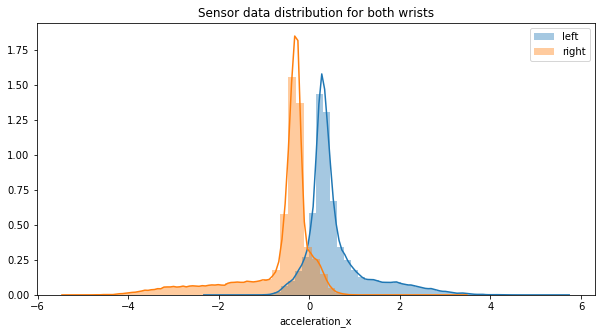

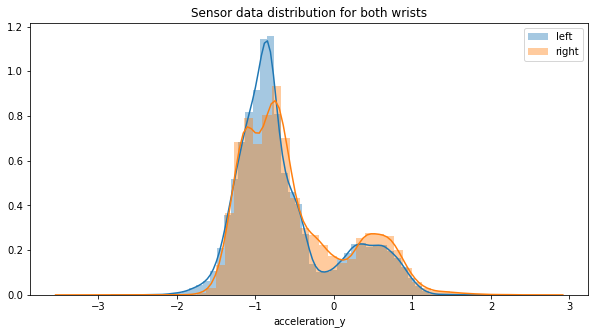

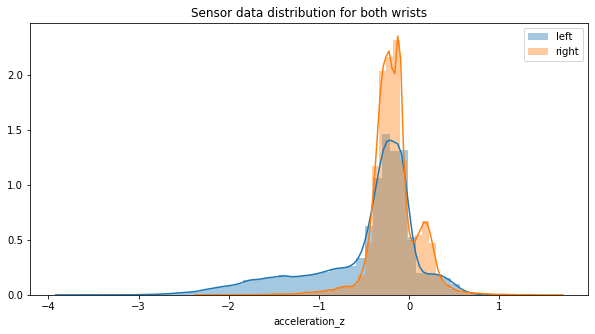

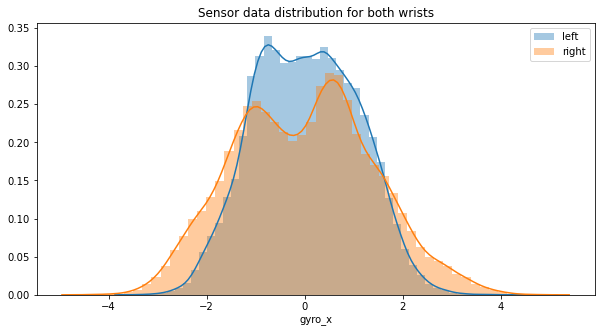

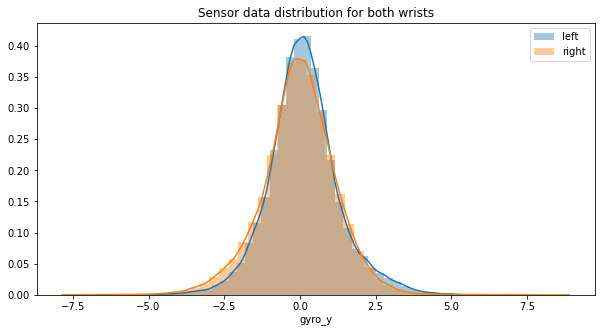

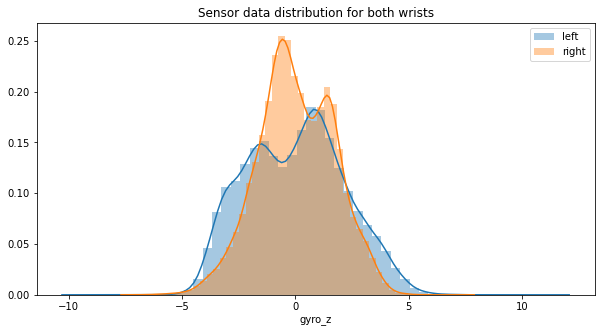

In [31]:
SENSOR_DATA_COLUMNS = ['acceleration_x', 'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z']

# populate dataframe with 'left' wrist only
df_left_wrist_data = pd.DataFrame()
df_left_wrist_data = df[df.wrist == 0]

# populate dataframe with 'right' wrist only
df_right_wrist_data = pd.DataFrame()
df_right_wrist_data = df[df.wrist == 1]

for c in SENSOR_DATA_COLUMNS:
    plt.figure(figsize=(10,5))
    plt.title("Sensor data distribution for both wrists")
    sns.distplot(df_left_wrist_data[c], label='left')
    sns.distplot(df_right_wrist_data[c], label='right')
    plt.legend()
    plt.show()

In [34]:
# assuming Date, Time and Username is not significant as of now so dropping them ..

#Drop cutomer id as not needed for analysis
Tdata.drop(['date','time','username'],axis=1, inplace=True)
Tdata.columns



Index(['wrist', 'activity', 'acceleration_x', 'acceleration_y',
       'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z'],
      dtype='object')

In [39]:
Tdata['activity'] = Tdata['activity'].replace(0,'walk')
Tdata['activity'] = Tdata['activity'].replace(1,'run')
Tdata.head()

Tdata['wrist'] = Tdata['wrist'].replace(0,'left')
Tdata['wrist'] = Tdata['wrist'].replace(1,'right')
Tdata.head()


,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,left,walk,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,left,walk,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,left,walk,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,left,walk,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,left,walk,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [40]:
Tdata.describe()

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,-0.074811,-0.562585,-0.313956,0.004160,0.037203,0.022327
std,1.009299,0.658458,0.486815,1.253423,1.198725,1.914423
min,-5.350500,-3.299000,-3.753800,-4.430600,-7.464700,-9.480000
25%,-0.381800,-1.033500,-0.376000,-0.920700,-0.644825,-1.345125
50%,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900
75%,0.355500,-0.241775,-0.085900,0.888800,0.733700,1.398200
max,5.603300,2.668000,1.640300,4.874200,8.498000,11.266200


In [42]:
Tdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   wrist           88588 non-null  object 
 1   activity        88588 non-null  object 
 2   acceleration_x  88588 non-null  float64
 3   acceleration_y  88588 non-null  float64
 4   acceleration_z  88588 non-null  float64
 5   gyro_x          88588 non-null  float64
 6   gyro_y          88588 non-null  float64
 7   gyro_z          88588 non-null  float64
dtypes: float64(6), object(2)
memory usage: 5.4+ MB


In [44]:
#Lets seperate Object Columns and Numerical Columns 
# create list of numeric and onject columns
Num_Cols=Tdata.select_dtypes(include=['float64']).columns.tolist()
Cat_Cols=Tdata.select_dtypes(include=['object']).columns.tolist()
Num_Cols
#Cat_Cols

['acceleration_x',
 'acceleration_y',
 'acceleration_z',
 'gyro_x',
 'gyro_y',
 'gyro_z']

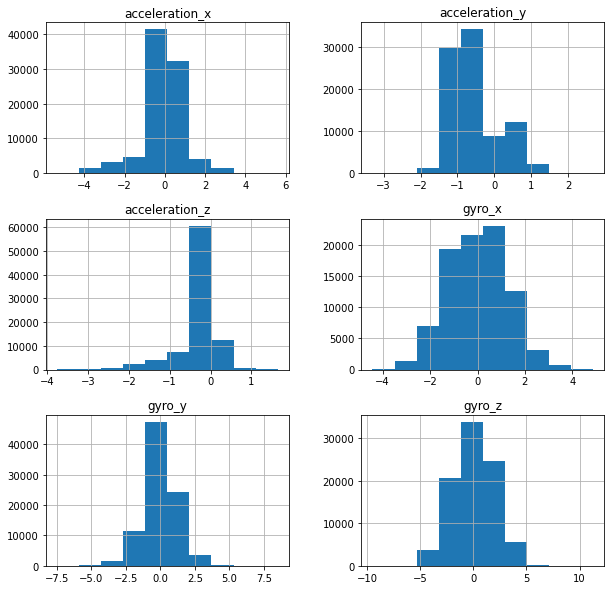

In [46]:
Tdata[Num_Cols].hist(figsize=(10,10))
plt.show()

In [47]:
Tdata[Cat_Cols].describe()

,wrist,activity
count,88588,88588
unique,2,2
top,right,run
freq,46258,44365


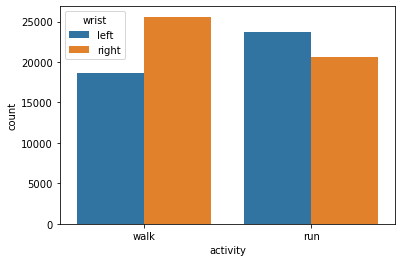

In [50]:
sns.countplot(x='activity', hue='wrist', data=Tdata);
# Gender doesnt decide whether a customer would churn

Index(['run', 'walk'], dtype='object')
run     44365
walk    44223
Name: activity, dtype: int64


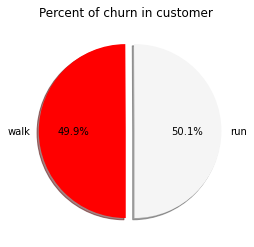

In [54]:
# Data to plot
#for each pie wedge, the format string is '1.1f%'.
walk =Tdata['activity'].value_counts(sort = 'walk').index
print(walk)
run = Tdata['activity'].value_counts(sort = 'run')
print(run)
colors = ["whitesmoke","red"]
explode = (0.1,0)  # explode 1st slice
 
plt.pie(run, explode=explode, labels=walk, colors=colors, autopct='%1.1f%%', shadow=True, startangle=270,)

plt.title('Percent of churn in customer')
plt.show()


In [57]:
#Correlation
corr=df.corr()
print(corr.shape)

(6, 6)


In [67]:
df.head()
df['wrist'] = df['wrist'].replace('left',0)
df['wrist'] = df['wrist'].replace('right',1)
df.head()


,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0,walk,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0,walk,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0,walk,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0,walk,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0,walk,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [ ]:
#  Logistic Regression Model

In [68]:
#Step1:   Split the data
from sklearn.model_selection import train_test_split
#Split your target and descriptive features
X = df.drop(['activity'],axis=1)
y = df["activity"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 1)
X_test.head()
X_test.shape
#X_train.shape

(8859, 7)

In [69]:
#Step2  Fit the model to the training data

from sklearn.linear_model import LogisticRegression

logistic_model=LogisticRegression()
logistic_model.fit(X_train,y_train)

LogisticRegression()

In [71]:
logistic_model.coef_.shape

(1, 7)

In [72]:
#Predict the test dataset from the model
y_pred=logistic_model.predict(X_test)
print(y_pred)

['run' 'walk' 'walk' ... 'run' 'run' 'walk']


[[3693  819]
 [ 409 3938]]
Figure(576x432) AxesSubplot(0.125,0.125;0.775x0.755)


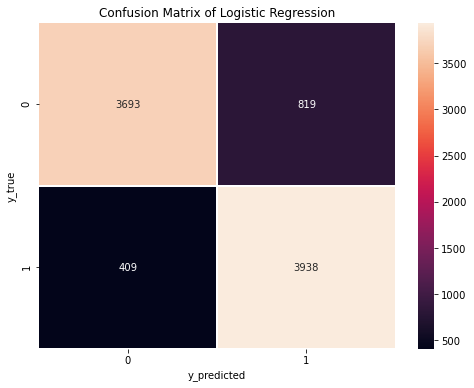

In [74]:
from sklearn.metrics import confusion_matrix

y_pred=logistic_model.predict(X_test)
#cm_lr = confusion_matrix(y_test,logistic_model.predict(X_test))
cm_lr = confusion_matrix(y_test,y_pred)
print(cm_lr)

# %% confusion matrix visualization
import seaborn as sns
f, ax = plt.subplots(figsize = (8,6))
print(f,ax)
sns.heatmap(cm_lr, annot = True, linewidths = 0.5, color = "red", fmt = ".0f", ax=ax)
plt.xlabel("y_predicted")
plt.ylabel("y_true")
plt.title("Confusion Matrix of Logistic Regression")
plt.show()

In [76]:
accuracy = logistic_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy*100)  
print((3693+3938)/(3693+3938+409+819))

Logistic Regression accuracy is : 86.13839033750988
0.8613839033750987


In [78]:
# Classification Report 

In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_test,logistic_model.predict(X_test)))

              precision    recall  f1-score   support

         run       0.90      0.82      0.86      4512
        walk       0.83      0.91      0.87      4347

    accuracy                           0.86      8859
   macro avg       0.86      0.86      0.86      8859
weighted avg       0.86      0.86      0.86      8859

